In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor/data.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [16]:
data = pd.read_csv(r"/kaggle/input/brain-tumor/data.csv")

In [17]:
data

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor
5,5,21,-13,5,11,-18,78,4,143,14,...,51,3,131,38,10,4,3,9,145,tumor
6,6,225,118,-5,175,-40,108,54,272,32,...,64,-3,142,55,202,-23,110,7,-14,tumor
7,7,-346,-35,37,42,39,18,14,28,34,...,84,-5,13,102,27,17,30,-5,-53,tumor
8,8,-378,31,-29,105,-54,19,-4,11,16,...,87,-4,110,25,18,15,97,0,-51,tumor
9,9,475,-79,20,41,10,65,-13,225,17,...,115,-4,95,47,41,-4,76,11,22,tumor


In [18]:
data.shape

(36, 7466)

In [19]:
data = data.drop(["Unnamed: 0"] , axis = 1)

In [20]:
data

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,tumor
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,tumor
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,tumor
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,tumor
5,21,-13,5,11,-18,78,4,143,14,-1,...,51,3,131,38,10,4,3,9,145,tumor
6,225,118,-5,175,-40,108,54,272,32,3,...,64,-3,142,55,202,-23,110,7,-14,tumor
7,-346,-35,37,42,39,18,14,28,34,-7,...,84,-5,13,102,27,17,30,-5,-53,tumor
8,-378,31,-29,105,-54,19,-4,11,16,-9,...,87,-4,110,25,18,15,97,0,-51,tumor
9,475,-79,20,41,10,65,-13,225,17,10,...,115,-4,95,47,41,-4,76,11,22,tumor


In [21]:
y = data["y"]

In [22]:
y 

0      tumor
1      tumor
2      tumor
3      tumor
4      tumor
5      tumor
6      tumor
7      tumor
8      tumor
9      tumor
10     tumor
11     tumor
12     tumor
13     tumor
14     tumor
15     tumor
16     tumor
17     tumor
18    Normal
19    Normal
20    Normal
21    Normal
22    Normal
23    Normal
24    Normal
25    Normal
26    Normal
27    Normal
28    Normal
29    Normal
30    Normal
31    Normal
32    Normal
33    Normal
34    Normal
35    Normal
Name: y, dtype: object

In [23]:
y = pd.DataFrame(y)

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
data_1 = pd.DataFrame(y)

In [37]:
data_1

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [27]:
data = data.drop(["y"] , axis = 1)

In [28]:
data

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
0,70,-81,25,10,22,113,36,163,9,25,...,44,75,5,68,138,53,-4,123,2,19
1,108,-30,-7,60,0,24,8,113,-3,9,...,110,186,6,60,93,140,-3,271,-1,-51
2,75,-1,5,48,6,34,27,35,-1,4,...,98,186,225,94,62,39,-14,127,7,192
3,871,4,14,78,-6,85,65,227,19,22,...,54,77,6,78,30,87,-4,59,3,367
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,142,87,303,204,81,105,9,265,-2,126
5,21,-13,5,11,-18,78,4,143,14,-1,...,2,51,3,131,38,10,4,3,9,145
6,225,118,-5,175,-40,108,54,272,32,3,...,46,64,-3,142,55,202,-23,110,7,-14
7,-346,-35,37,42,39,18,14,28,34,-7,...,15,84,-5,13,102,27,17,30,-5,-53
8,-378,31,-29,105,-54,19,-4,11,16,-9,...,14,87,-4,110,25,18,15,97,0,-51
9,475,-79,20,41,10,65,-13,225,17,10,...,18,115,-4,95,47,41,-4,76,11,22


In [38]:
data = pd.concat((data , data_1) , axis = 1)

In [39]:
data

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,0
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,1
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,1
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,1
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,1
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,1
5,21,-13,5,11,-18,78,4,143,14,-1,...,51,3,131,38,10,4,3,9,145,1
6,225,118,-5,175,-40,108,54,272,32,3,...,64,-3,142,55,202,-23,110,7,-14,1
7,-346,-35,37,42,39,18,14,28,34,-7,...,84,-5,13,102,27,17,30,-5,-53,1
8,-378,31,-29,105,-54,19,-4,11,16,-9,...,87,-4,110,25,18,15,97,0,-51,1
9,475,-79,20,41,10,65,-13,225,17,10,...,115,-4,95,47,41,-4,76,11,22,1


In [40]:
data.columns

Index([  'X53416',   'M83670',   'X90908',   'M97496', 'X90908.1',   'U37019',
         'R48602',   'T96548',   'X64559',   'T55741',
       ...
         'H87456',   'R64130', 'H11125.1',   'U22055',   'L22524', 'M13699.1',
         'X54489',   'T55008', 'M10065.2',          0],
      dtype='object', length=7465)

In [63]:
data = data.rename(columns = {0:"y"})

In [64]:
data

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,70,-81,25,10,22,113,36,163,9,25,...,75,5,68,138,53,-4,123,2,19,1
1,108,-30,-7,60,0,24,8,113,-3,9,...,186,6,60,93,140,-3,271,-1,-51,1
2,75,-1,5,48,6,34,27,35,-1,4,...,186,225,94,62,39,-14,127,7,192,1
3,871,4,14,78,-6,85,65,227,19,22,...,77,6,78,30,87,-4,59,3,367,1
4,-92,-34,14,19,11,-6,27,-8,9,-5,...,87,303,204,81,105,9,265,-2,126,1
5,21,-13,5,11,-18,78,4,143,14,-1,...,51,3,131,38,10,4,3,9,145,1
6,225,118,-5,175,-40,108,54,272,32,3,...,64,-3,142,55,202,-23,110,7,-14,1
7,-346,-35,37,42,39,18,14,28,34,-7,...,84,-5,13,102,27,17,30,-5,-53,1
8,-378,31,-29,105,-54,19,-4,11,16,-9,...,87,-4,110,25,18,15,97,0,-51,1
9,475,-79,20,41,10,65,-13,225,17,10,...,115,-4,95,47,41,-4,76,11,22,1


In [65]:
data.shape

(36, 7465)

In [66]:
data.columns

Index(['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7465)

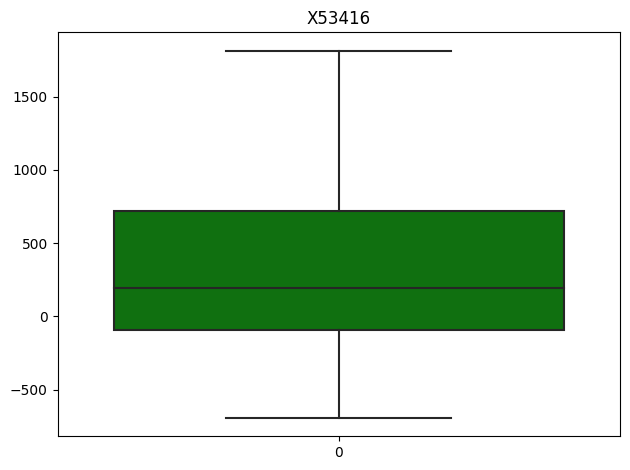

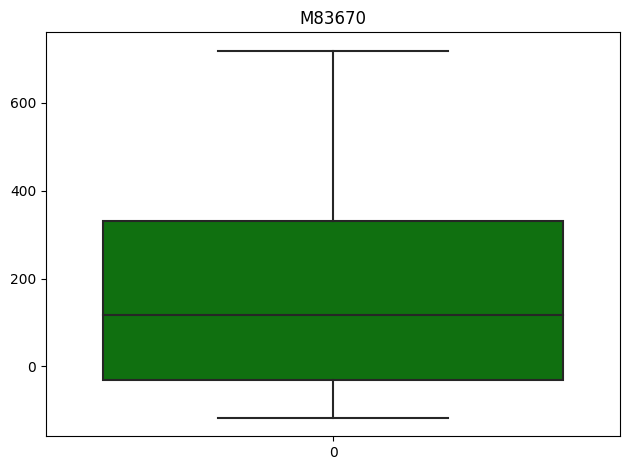

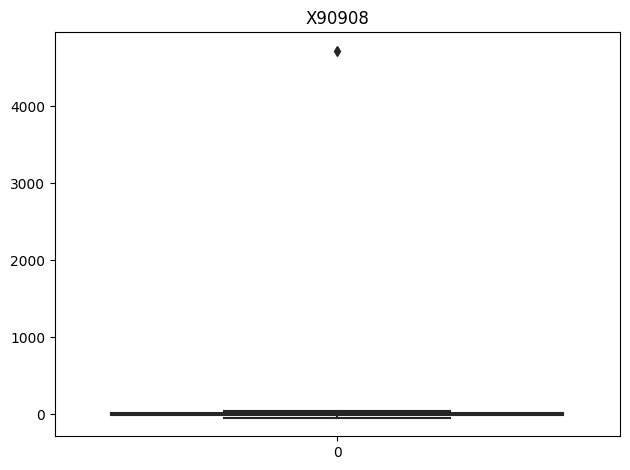

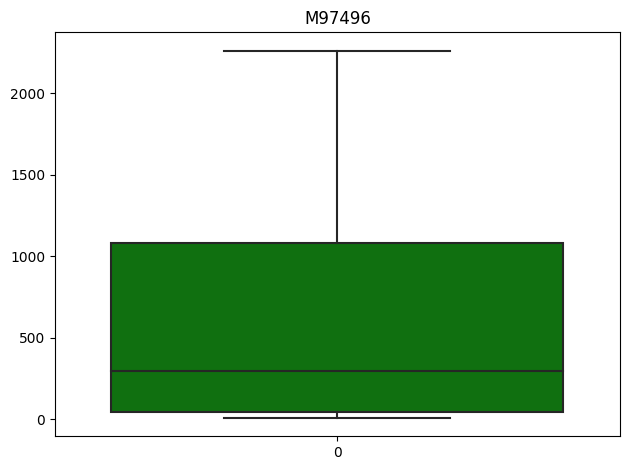

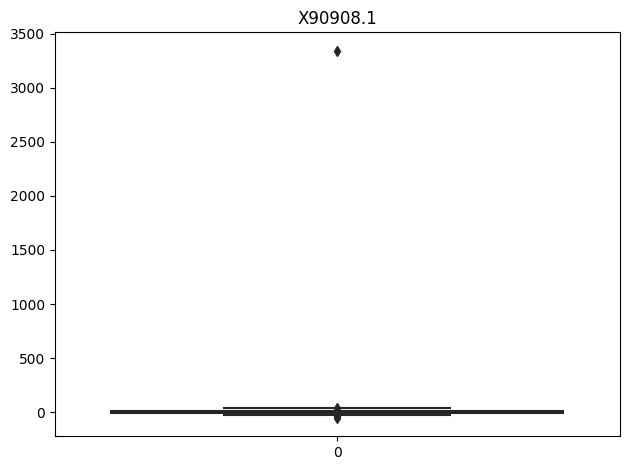

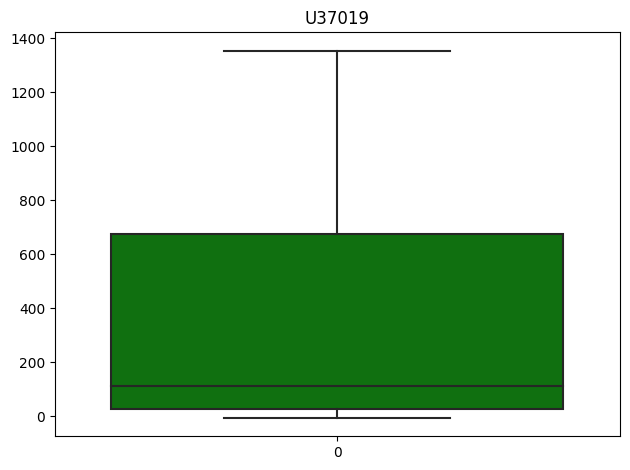

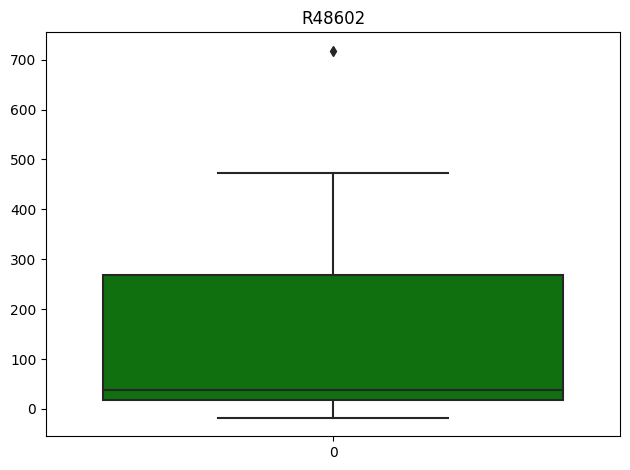

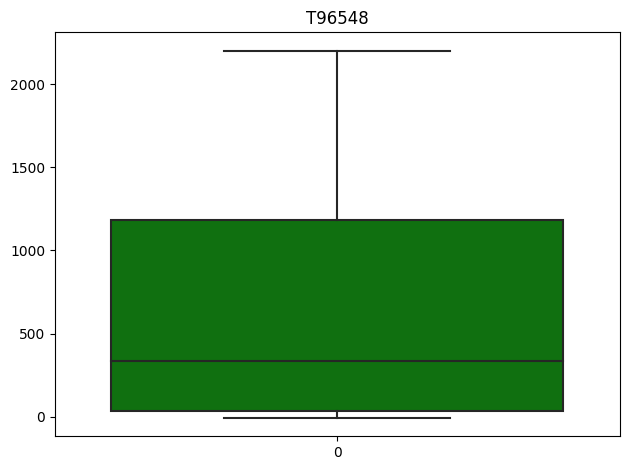

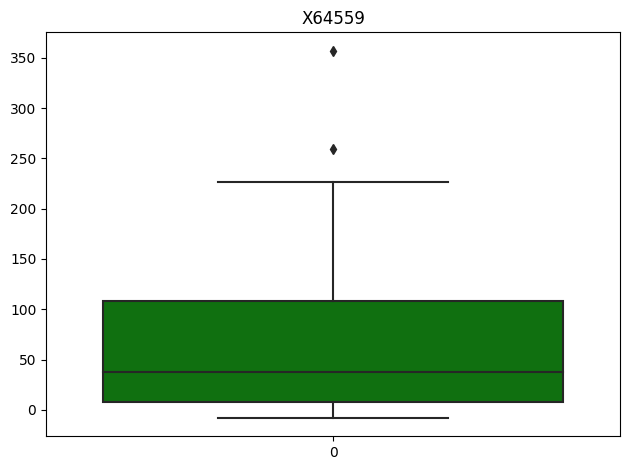

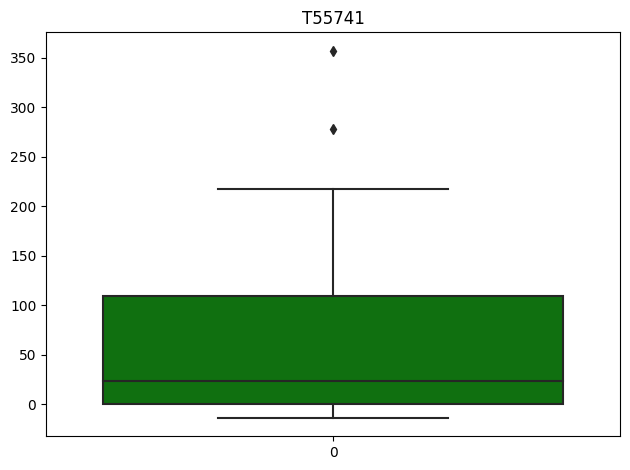

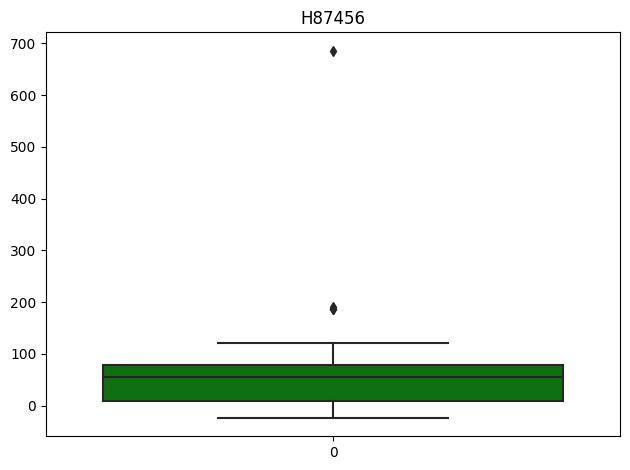

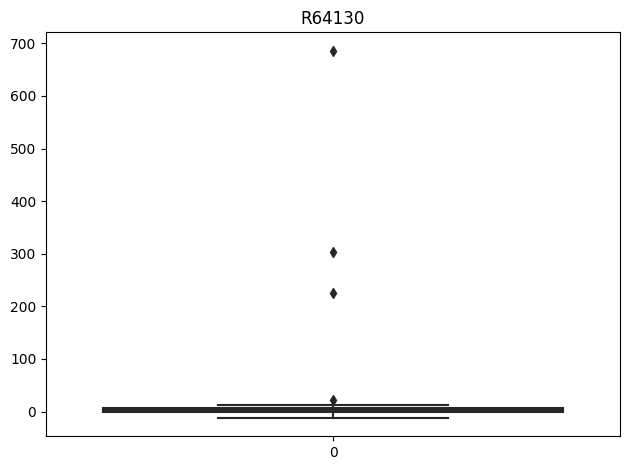

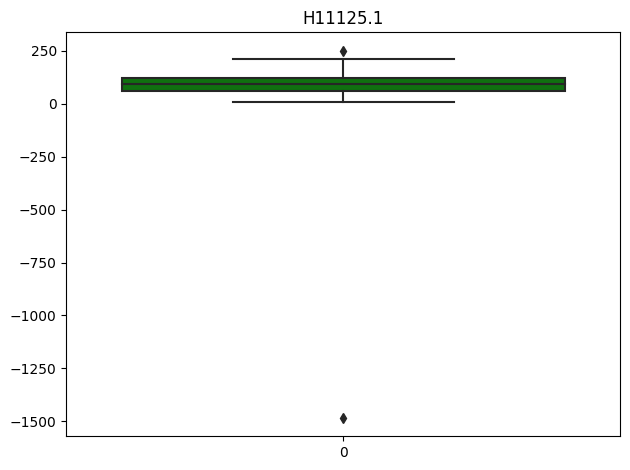

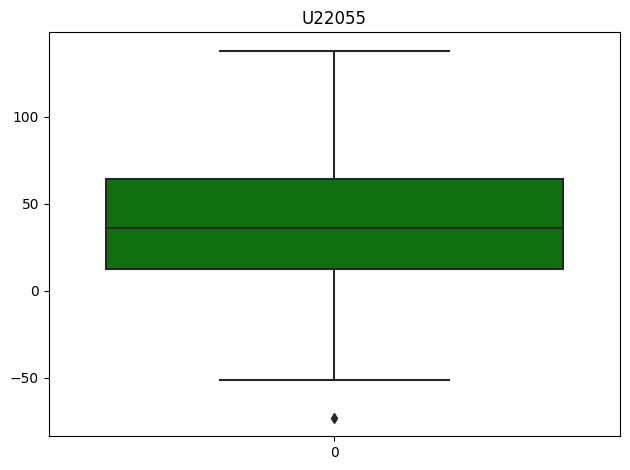

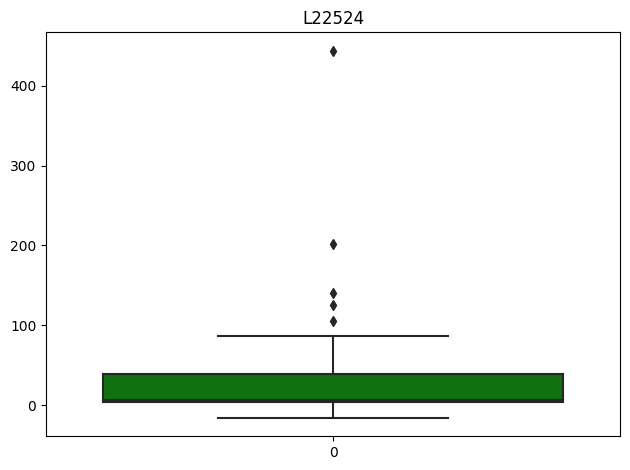

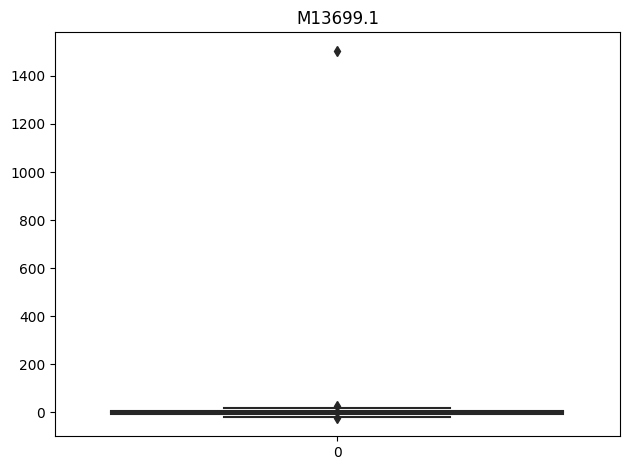

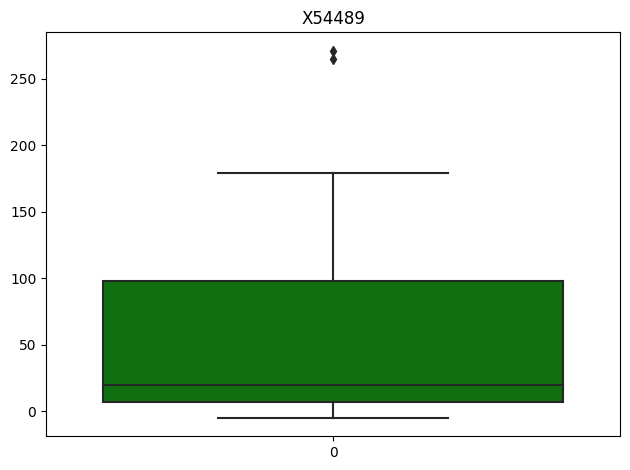

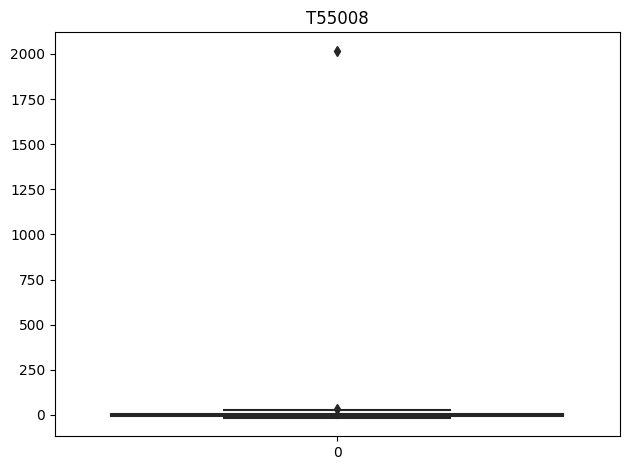

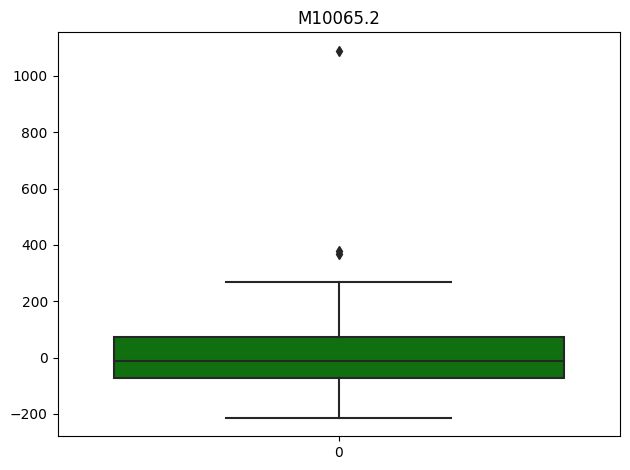

In [69]:
for i in ['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741','H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2']:
          sn.boxplot(data[i] , color = "green")
          plt.title(i)
          plt.tight_layout()
          plt.show()

In [70]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
upper_bound = q3+1.5*(iqr)
lower_bound = q1-1.5*(iqr)
print(upper_bound , lower_bound)

X53416      1948.000
M83670       872.750
X90908        54.875
M97496      2627.250
X90908.1      36.125
              ...   
M13699.1      23.375
X54489       235.125
T55008        25.000
M10065.2     294.750
y              2.500
Length: 7465, dtype: float64 X53416     -1322.000
M83670      -573.250
X90908       -54.125
M97496     -1500.750
X90908.1     -32.875
              ...   
M13699.1     -21.625
X54489      -129.875
T55008       -23.000
M10065.2    -293.250
y             -1.500
Length: 7465, dtype: float64


In [74]:
data = data[~((data>upper_bound))|((data<lower_bound))]

In [75]:
data.shape

(36, 7465)

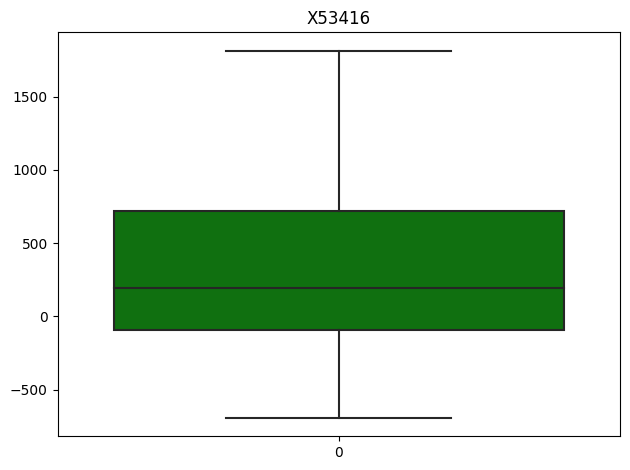

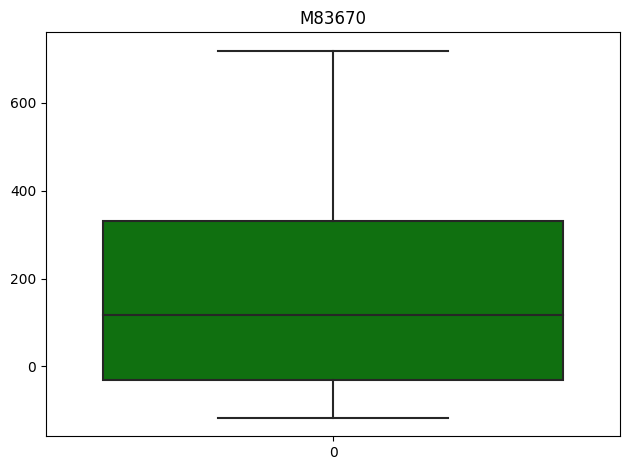

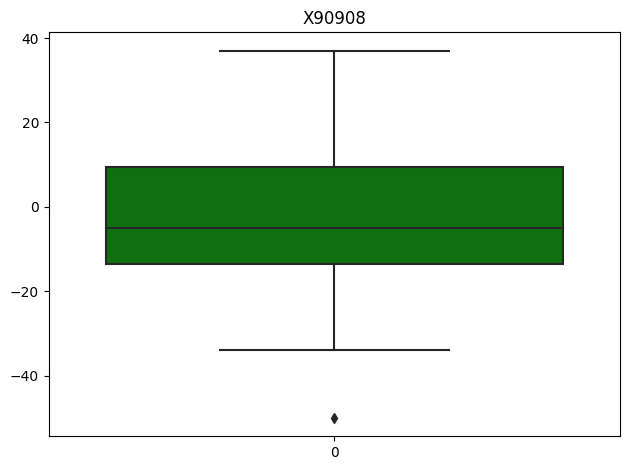

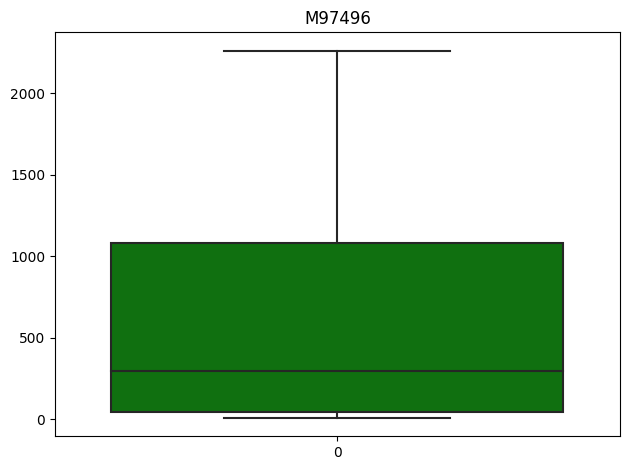

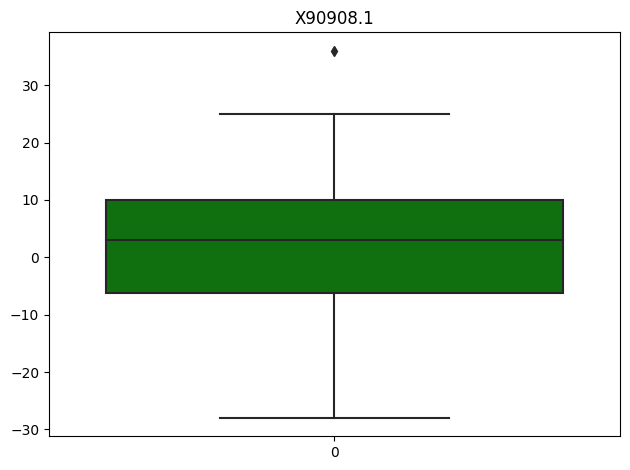

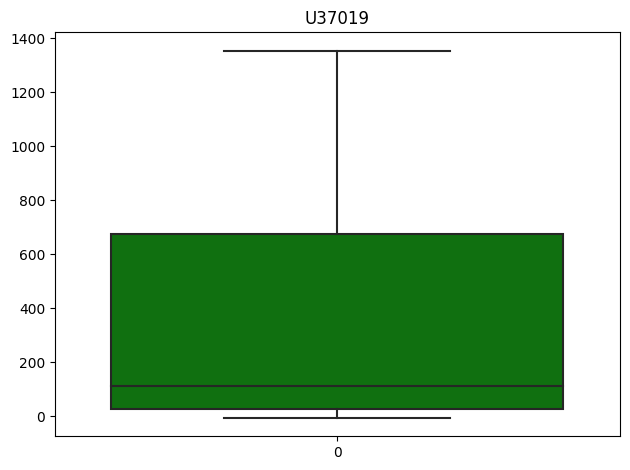

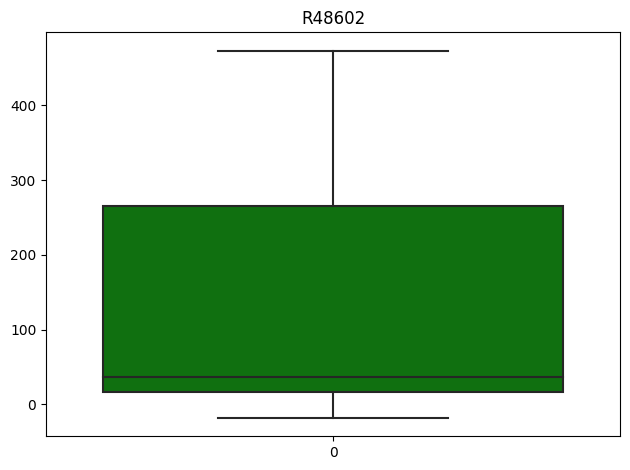

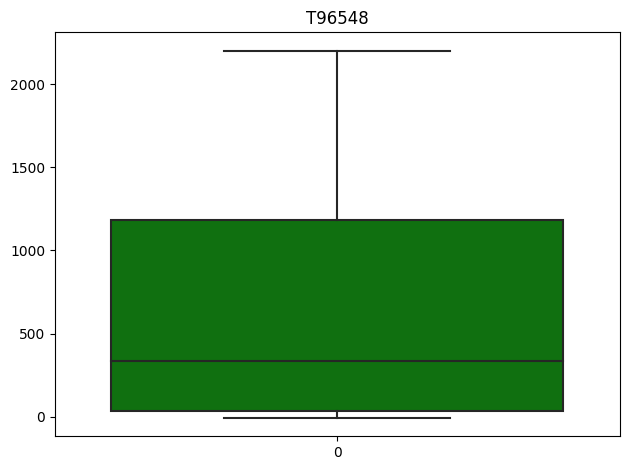

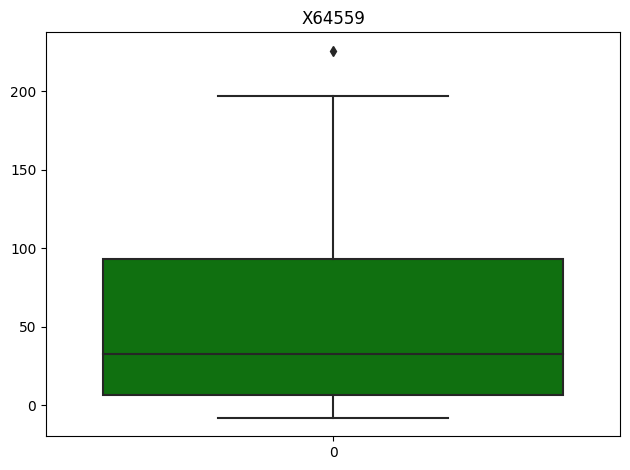

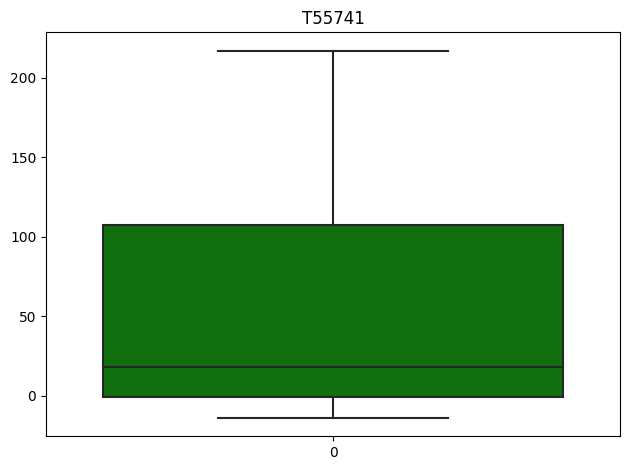

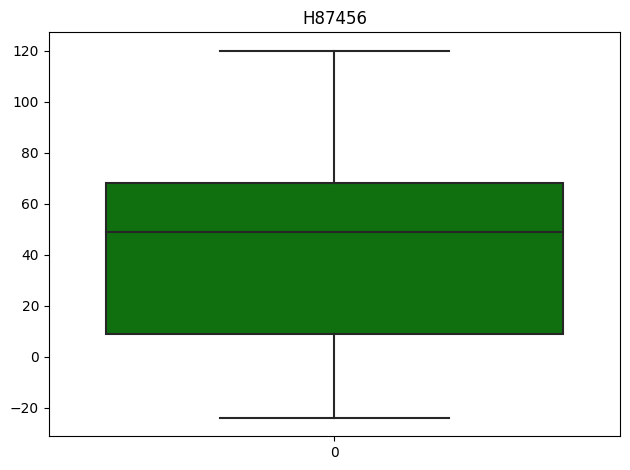

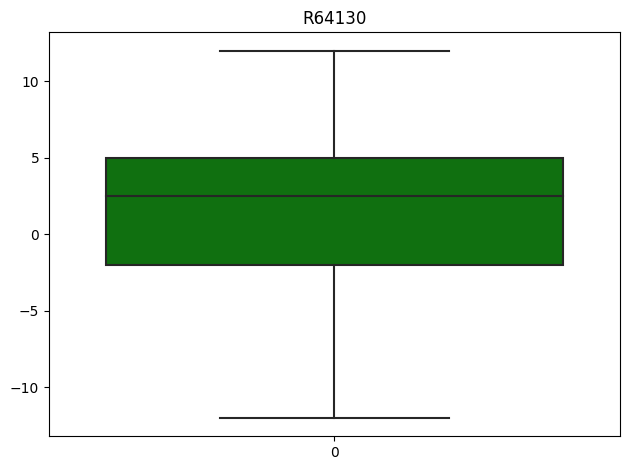

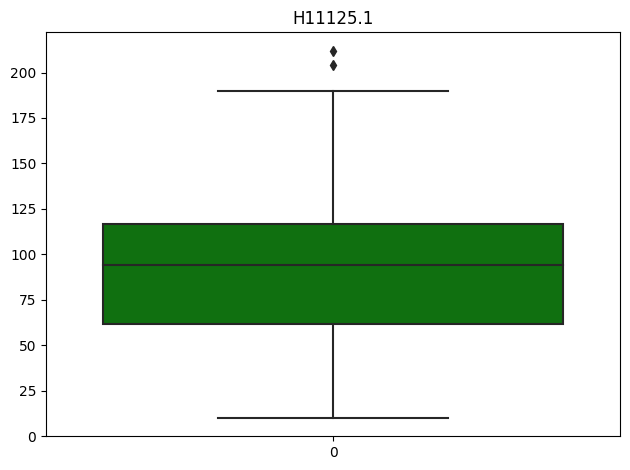

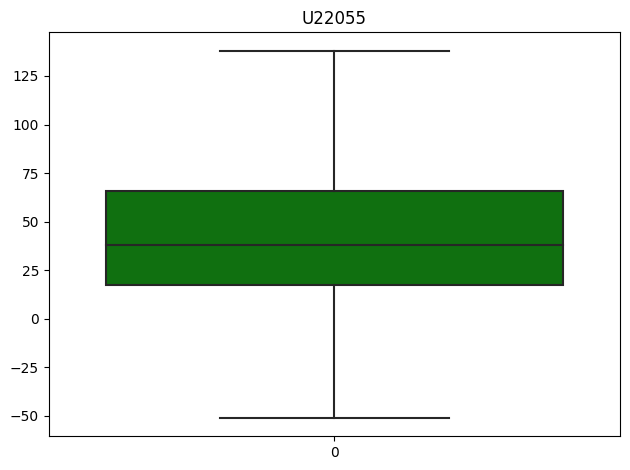

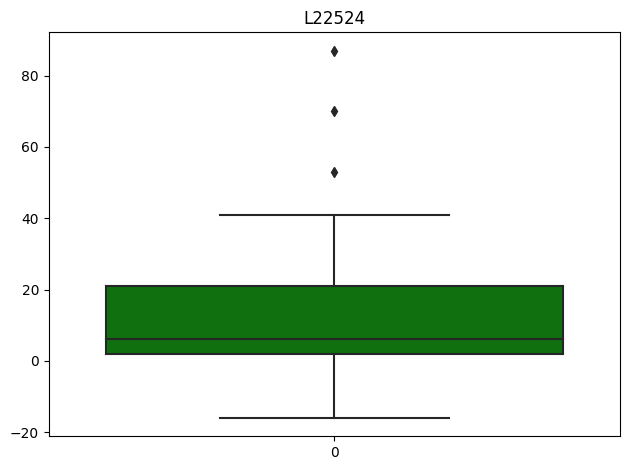

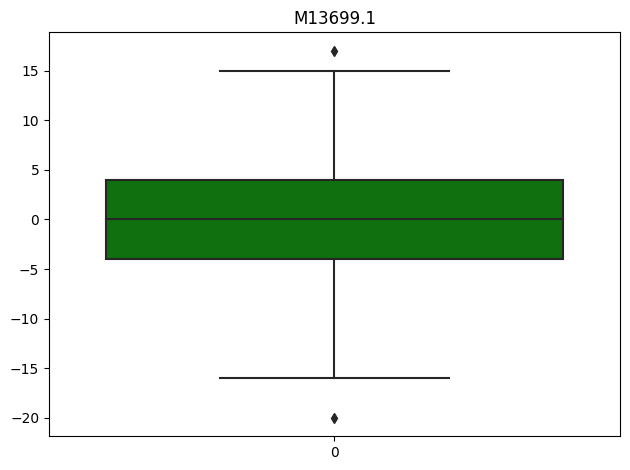

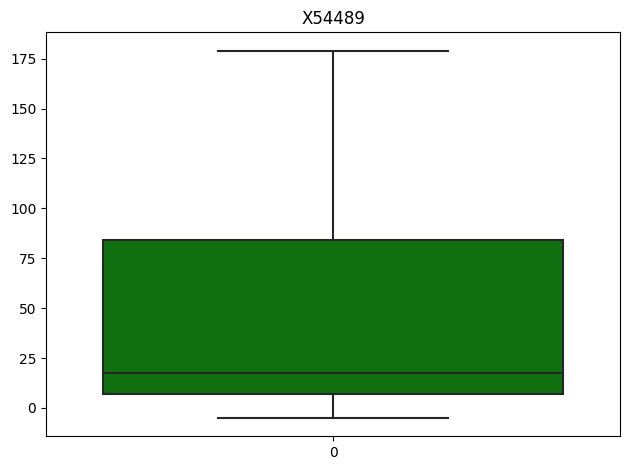

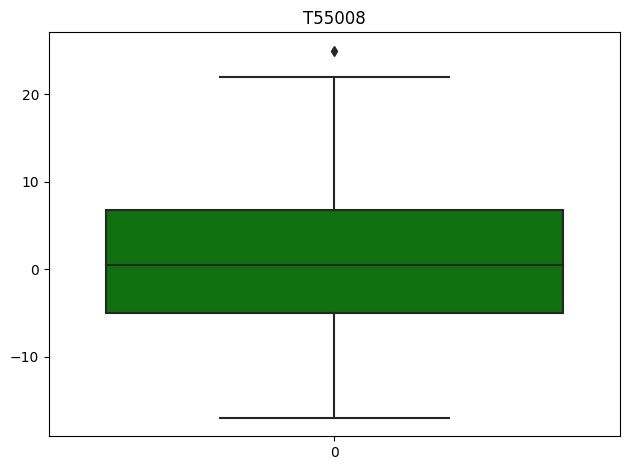

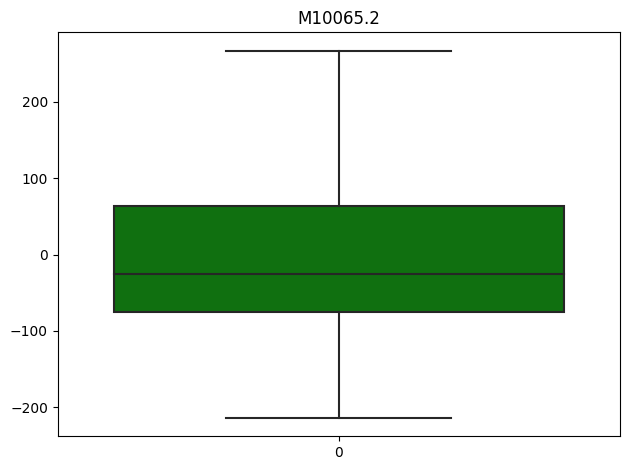

In [76]:
for i in ['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741','H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2']:
    sn.boxplot(data[i] , color = "green")
    plt.title(i)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='y', ylabel='count'>

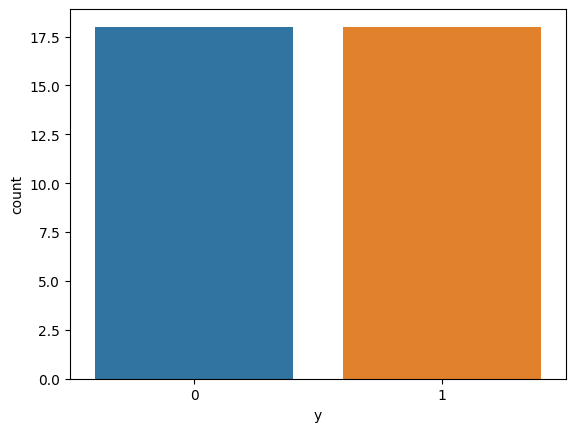

In [77]:
sn.countplot( x = "y",data = data)

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


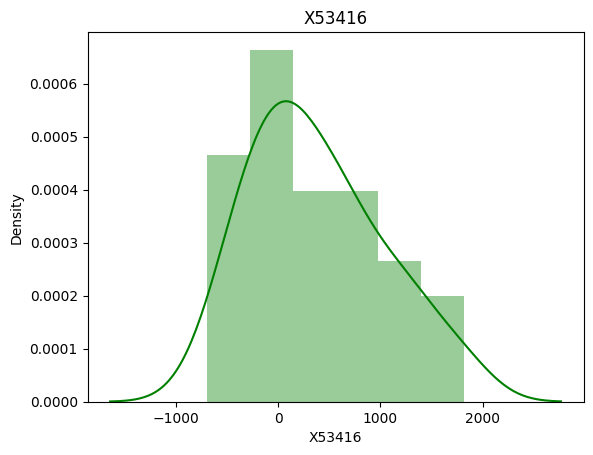

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


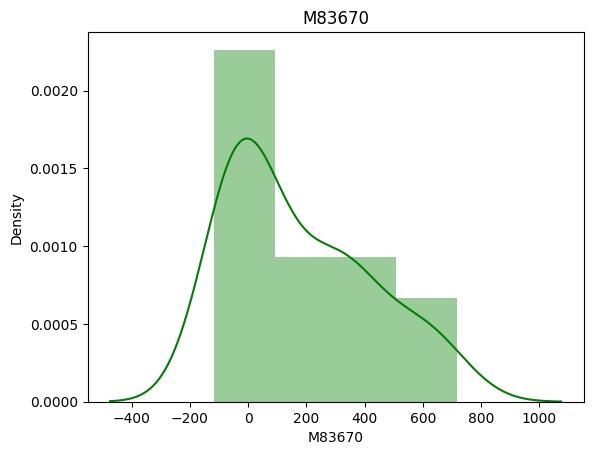

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


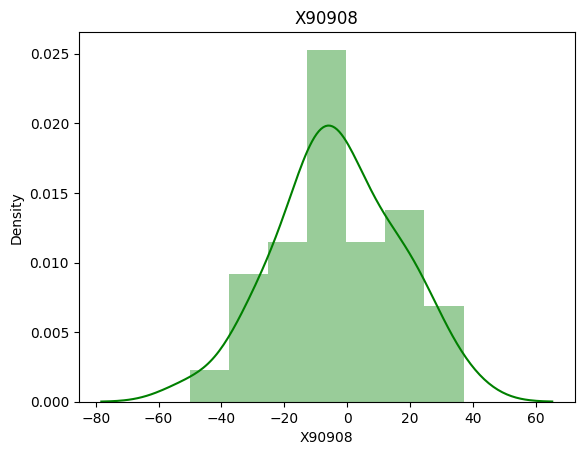

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


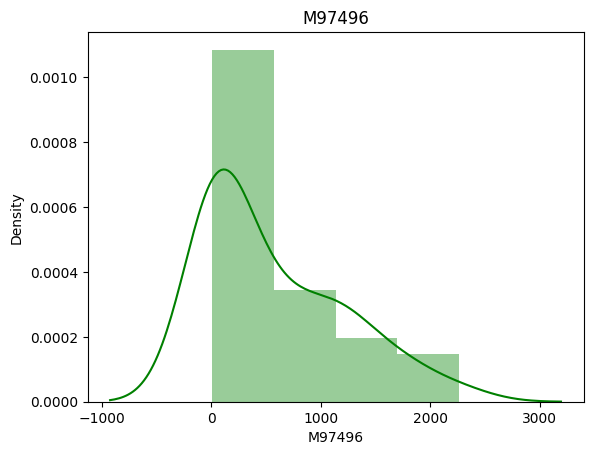

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


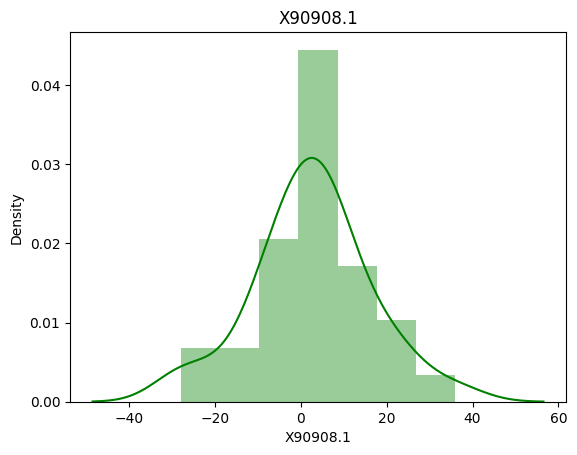

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


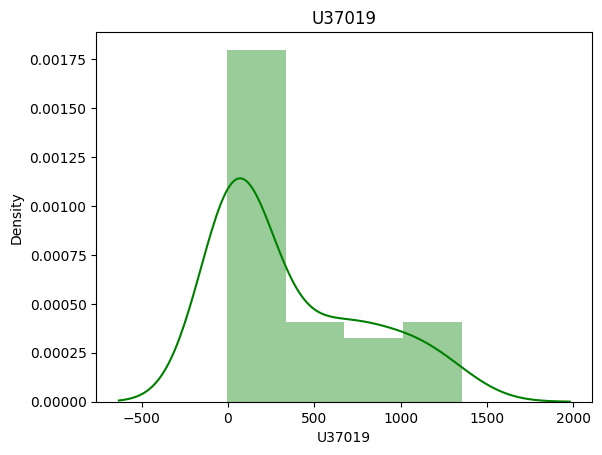

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


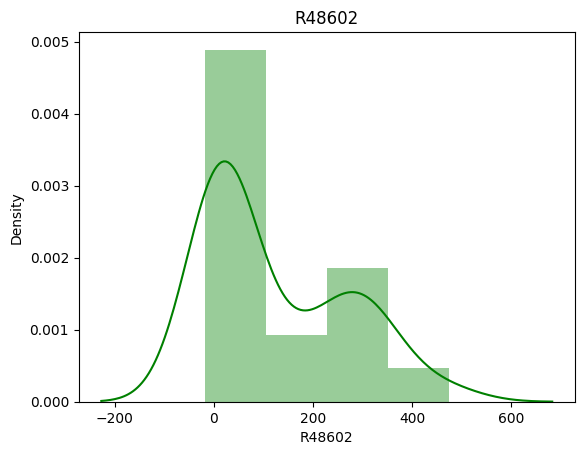

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


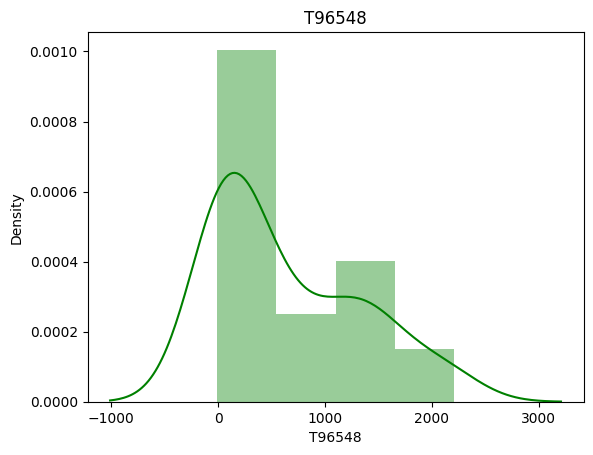

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


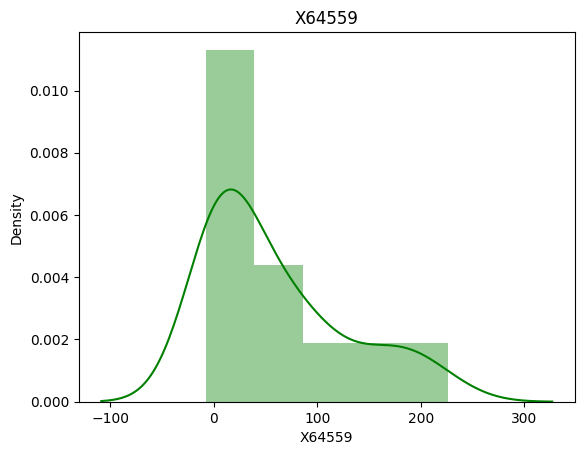

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


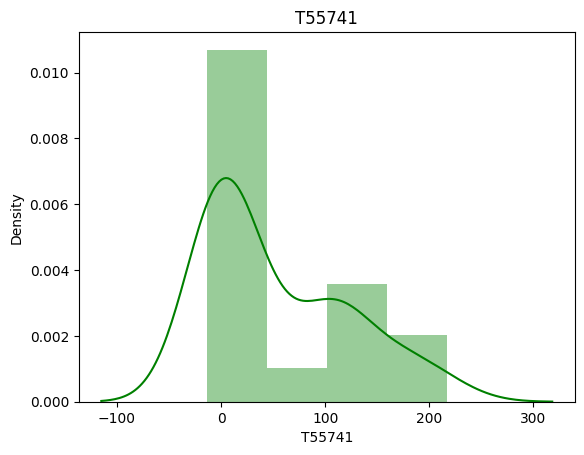

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


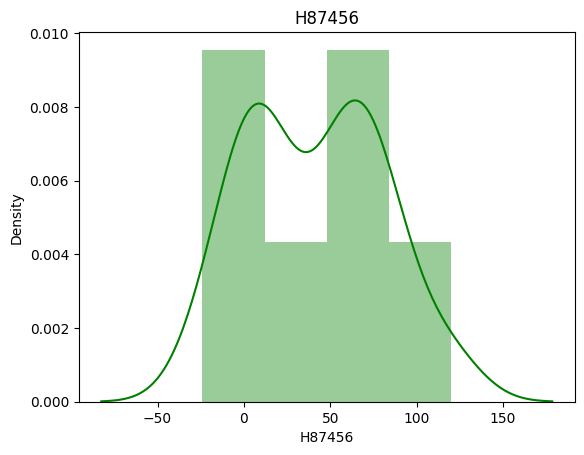

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


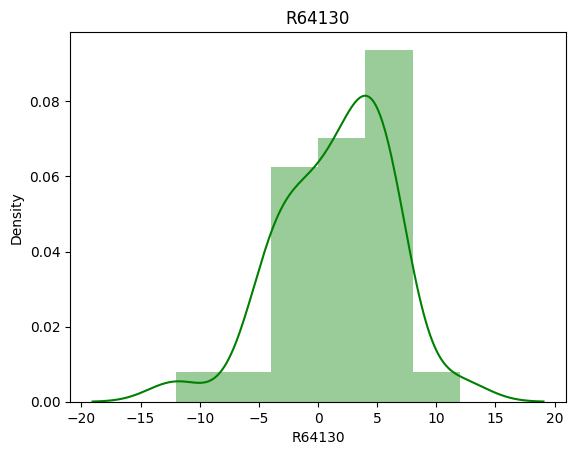

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


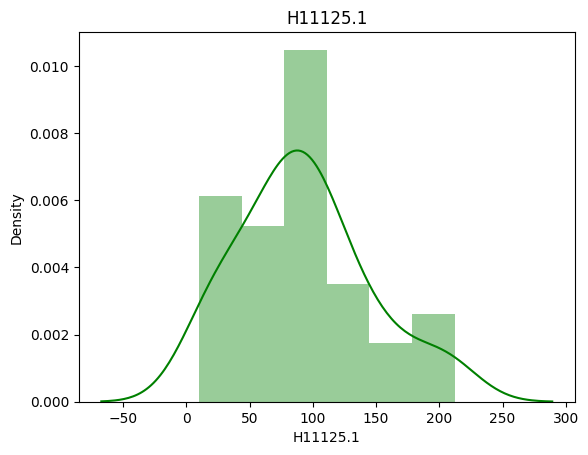

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


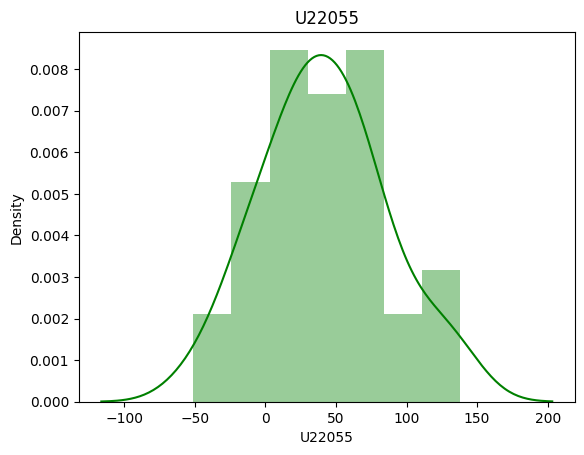

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


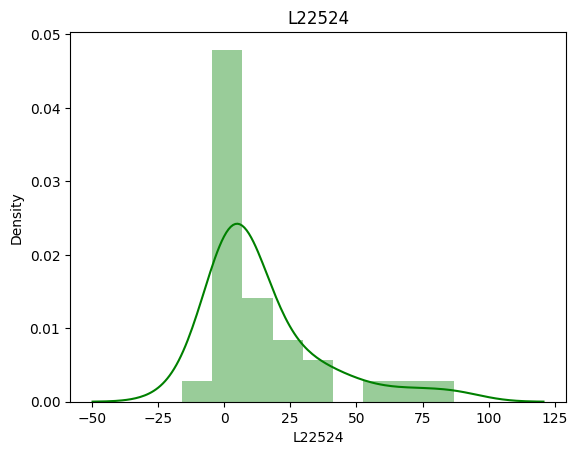

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


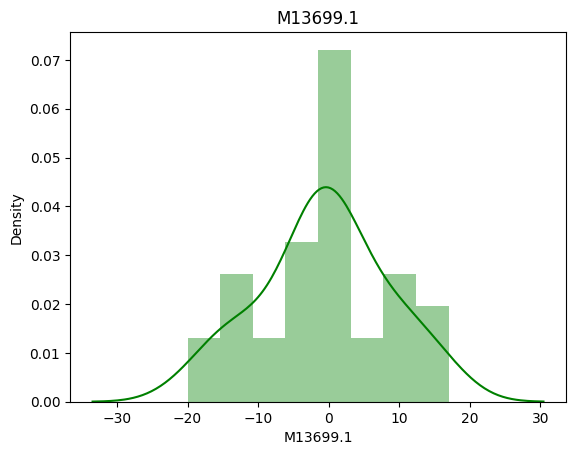

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


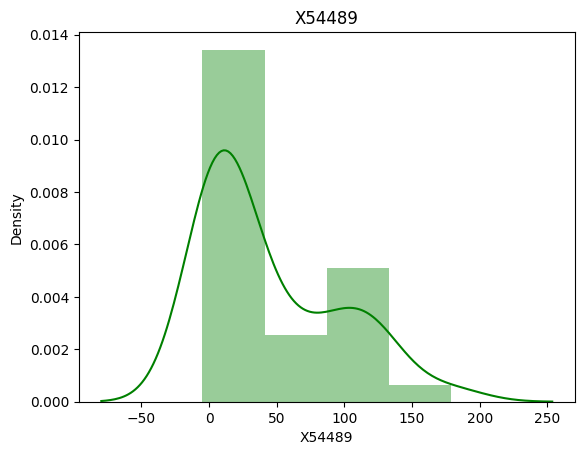

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


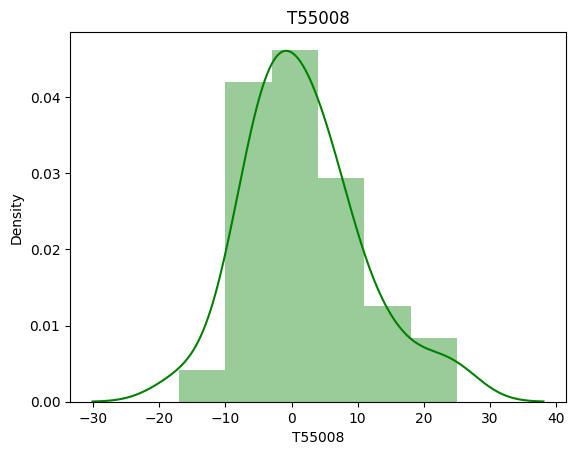

/tmp/ipykernel_33/1432295373.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data[i] , color = "green")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


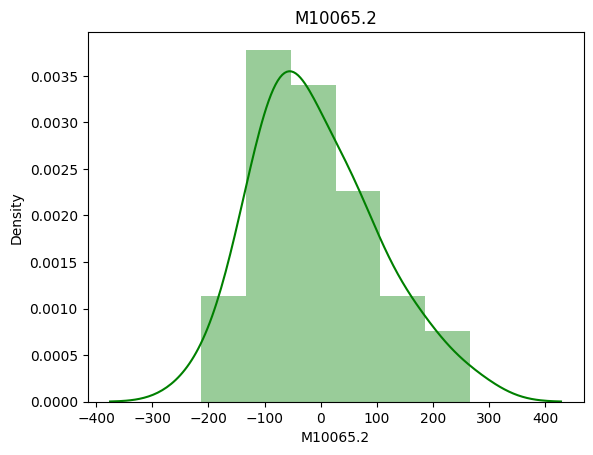

In [80]:
for i in ['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741','H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2']:
          sn.distplot(data[i] , color = "green")
          plt.title(i)
          plt.show()

In [81]:
x = data.drop(["y"] , axis = 1)
y = data["y"]

In [88]:
x.isnull().sum()

X53416      0
M83670      0
X90908      1
M97496      0
X90908.1    4
           ..
L22524      5
M13699.1    3
X54489      2
T55008      2
M10065.2    3
Length: 7464, dtype: int64

In [89]:
x = x.fillna(0)

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.20 , random_state = 42)


In [92]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [93]:
model = LogisticRegression()

In [94]:
model.fit(x_train , y_train)

LogisticRegression()

In [95]:
y_pred = model.predict(x_test)

In [96]:
accuracy_model = accuracy_score(y_test , y_pred)

In [97]:
accuracy_model

1.0

In [104]:
classification_result = classification_report(y_test , y_pred)
print(classification_result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



<Axes: >

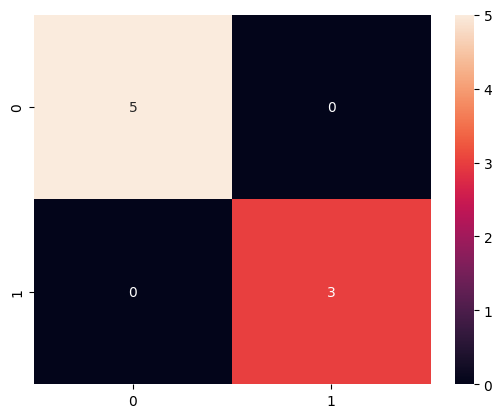

In [105]:
cm = confusion_matrix(y_test , y_pred)
sn.heatmap(cm , annot = True)

In [98]:
from sklearn.metrics import roc_curve , roc_auc_score

Text(0, 0.5, 'tpr')

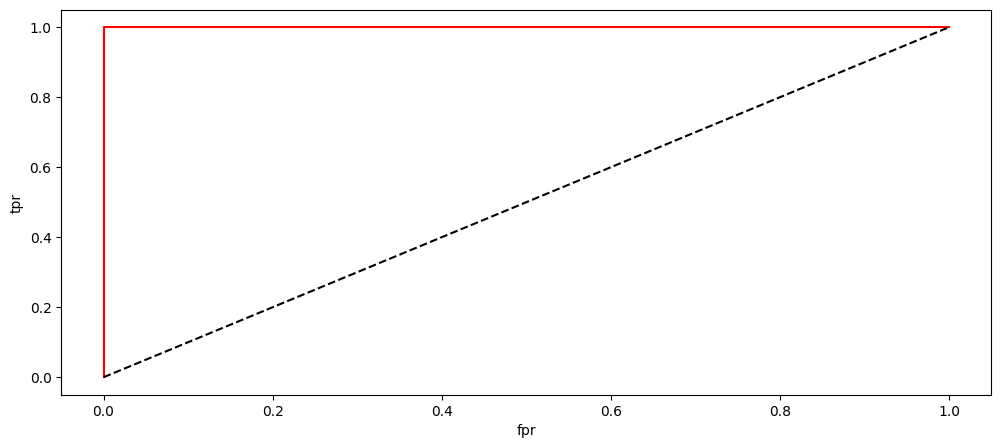

In [99]:
fpr ,tpr,_ = roc_curve(y_test , y_pred)
auc = roc_auc_score(y_test , y_pred)
plt.figure(figsize = (12,5))
plt.plot(fpr , tpr, color = "red" , label = "ROC CURVE(AUC = %0.2f)"%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("fpr")
plt.ylabel("tpr")

In [102]:
from sklearn.svm import SVC

In [103]:
model_svc = SVC()
model_svc.fit(x_train ,y_train)

SVC()

In [106]:
y_pred_svm = model_svc.predict(x_test)

In [107]:
accuracy_svc = accuracy_score(y_test , y_pred_svm)

In [108]:
print(accuracy_svc)

1.0
